In [ ]:
# y = 3.2 + 1.87x
# 1. On average, for one unit of increase in x, y increases by 1.87.
# 2. R^2 = 89%. Interpretation: about 89% of the variabilyt in y can be explained
# by the linear model in which x is the predictor variable.
# 3. Predict y when x = 3.2 => y = 3.2 + 1.87*3.2 = 9.184

In [3]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Reading the csv file 
autos = pd.read_csv('Automobile_data.csv')
autos.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


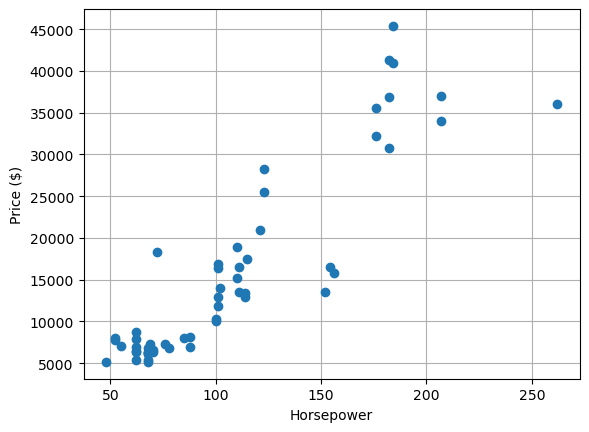

In [5]:
plt.plot('horsepower', 'price', 'o', data = autos)
plt.xlabel('Horsepower')
plt.ylabel('Price ($)')
plt.grid();

# From the below plot, we see there is a positive relationship between horsepower and price.

In [6]:
# Building the linear model 
lm_md = smf.ols(formula = 'price ~ horsepower', data = autos).fit()

# Extracting model results
lm_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     243.6
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           4.74e-22
Time:                        10:45:43   Log-Likelihood:                -574.55
No. Observations:                  58   AIC:                             1153.
Df Residuals:                      56   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6743.6285   1559.176     -4.325      0.000   -9867.033   -3620.224
horsepower   208.6777     13.371     15.607      0.000     181.893     235.462
==============================================================================
Omnibus:                        3.926   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                3.563
Skew:                           0.251   Prob(JB):                        0.168
Kurtosis:                       4.105   Cond. No.                         280.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Computing the residuals
autos['residuals'] = autos['price'] - lm_md.fittedvalues
autos.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,residuals
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0,-2924.594763
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0,80.405237
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0,-8892.735316
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0,-591.495577
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0,195.694488


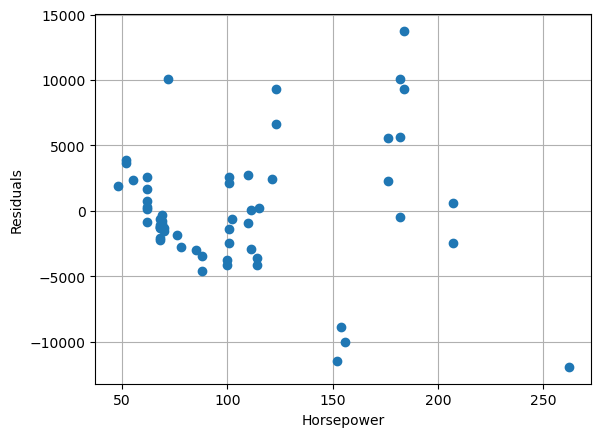

In [10]:
# Checking for linearity
plt.plot('horsepower', 'residuals', 'o', data = autos)
plt.xlabel('Horsepower')
plt.ylabel('Residuals')
plt.grid();

In [ ]:
# From the above, the residuals are increasing in absolute value from left to right, which indicates 
# the assumption of linearity is not met.